In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops

2022-02-10 19:13:34.537562: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-10 19:13:34.537632: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


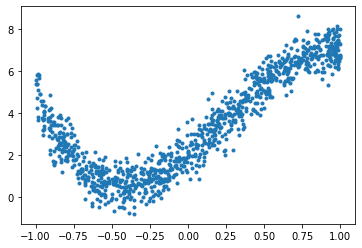

In [2]:
sample_num = 1000 # number of sample
val_ratio = 0.2 # 20% of total sample as validation set
test_ratio = 0.2 # 20% of total sample as test set

x_val = np.random.uniform(low = -1, high = 1, size = sample_num)
np.random.shuffle(x_val)
w1 = np.random.randint(low = -10, high = 10)
w2 = np.random.randint(low = -10, high = 10)
w3 = np.random.randint(low = -10, high = 10)
w4 = np.random.randint(low = -10, high = 10)

y = w1*x_val**3 + w2*x_val**2 + w3*x_val + w4
y_val = y + (0.6 * np.random.randn(x_val.shape[0])) # add noise
plt.plot(x_val, y_val, '.')

In [3]:
# dataset split into training, validation, and test sets

val_split = int(val_ratio * sample_num)
test_split = int(val_split + (test_ratio * sample_num))
x_val, x_test, x_train = np.split(x_val, [val_split, test_split])
y_val, y_test, y_train = np.split(y_val, [val_split, test_split])

# Check that our splits add up correctly
assert(x_train.size + x_val.size + x_test.size) == sample_num

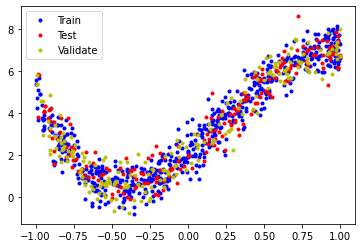

In [4]:
# visualization of training, validation, and test sets
plt.figure(1)
plt.plot(x_train, y_train, 'b.', label = 'Train')
plt.plot(x_test, y_test, 'r.', label="Test")
plt.plot(x_val, y_val, 'y.', label="Validate")
plt.legend()
plt.show()

In [15]:
def initialize_parameters():

    tf.set_random_seed(1)  # so that your "random" numbers match ours

    ### START CODE HERE ### (approx. 6 lines of code)
    W1 = tf.get_variable("W1", [25, 12288], initializer=tf.contrib.layers.xavier_initializer(seed=1))
    b1 = tf.get_variable("b1", [25, 1], initializer=tf.zeros_initializer())
    W2 = tf.get_variable("W2", [12, 25], initializer=tf.contrib.layers.xavier_initializer(seed=1))
    b2 = tf.get_variable("b2", [12, 1], initializer=tf.zeros_initializer())
    W3 = tf.get_variable("W3", [6, 12], initializer=tf.contrib.layers.xavier_initializer(seed=1))
    b3 = tf.get_variable("b3", [6, 1], initializer=tf.zeros_initializer())
    ### END CODE HERE ###

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}

    return parameters


# GRADED FUNCTION: forward_propagation

def forward_propagation(X, parameters):

    # Retrieve the parameters from the dictionary "parameters"
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']

    ### START CODE HERE ### (approx. 5 lines)              # Numpy Equivalents:
    Z1 = tf.add(tf.matmul(W1, X), b1)  # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.relu(Z1)  # A1 = relu(Z1)
    Z2 = tf.add(tf.matmul(W2, A1), b2)  # Z2 = np.dot(W2, a1) + b2
    A2 = tf.nn.relu(Z2)  # A2 = relu(Z2)
    Z3 = tf.add(tf.matmul(W3, A2), b3)  # Z3 = np.dot(W3,Z2) + b3
    ### END CODE HERE ###

    return Z3